In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random

data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x1 = [i[0] for i in data]
y = [i[1] for i in data]

x_g=[i[0] for i in data]
y_g=[i[1] for i in data]

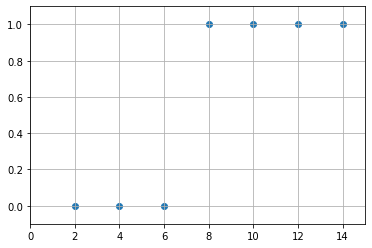

In [21]:
#그래프로 나타내 봅니다.
plt.scatter(x1, y)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
plt.grid(True)

In [22]:
x1_data = np.array(x1)
y_data = np.array(y)

#a = tf.Variable(random.random())
#b = tf.Variable(random.random())

a = tf.Variable(0, dtype=tf.float32)
b = tf.Variable(0, dtype=tf.float32)

In [23]:
def compute_loss():
    hypothesis = tf.math.sigmoid(a*x1_data+b)
    loss = -tf.math.reduce_mean(y_data * tf.math.log(hypothesis) 
                                + (1 - y_data) * tf.math.log(1-hypothesis))
    return loss

In [24]:
optimizer = tf.optimizers.SGD(lr=0.05)
epoch = 15001

for i in range(epoch):
    optimizer.minimize(compute_loss, var_list=[a,b])
    if i%1000 == 0:
        print(i,'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

0 a: 0.11428572 b: 0.003571429 loss: 0.5546378
1000 a: 0.6151289 b: -3.9133995 loss: 0.18809369
2000 a: 0.831343 b: -5.517361 loss: 0.13457471
3000 a: 0.98071724 b: -6.602698 loss: 0.11040015
4000 a: 1.098763 b: -7.4521236 loss: 0.09564186
5000 a: 1.1981719 b: -8.163362 loss: 0.08530726
6000 a: 1.2850072 b: -8.782278 loss: 0.0774856
7000 a: 1.3626691 b: -9.334306 loss: 0.07126484
8000 a: 1.4332715 b: -9.835133 loss: 0.06614529
9000 a: 1.4982277 b: -10.295177 loss: 0.061825905
10000 a: 1.5585366 b: -10.721763 loss: 0.05811214
11000 a: 1.6149313 b: -11.120252 loss: 0.05487161
12000 a: 1.6679708 b: -11.494706 loss: 0.052010145
13000 a: 1.7180912 b: -11.848301 loss: 0.04945873
14000 a: 1.7656425 b: -12.183562 loss: 0.047164984
15000 a: 1.8109086 b: -12.50254 loss: 0.045088716


기울기=1.8109, 절편=-12.5025


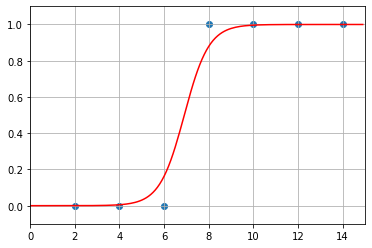

In [25]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
plt.scatter(x_g, y_g)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위를 정합니다.
plt.plot(np.arange(0, 15, 0.1), np.array([tf.math.sigmoid(a*x + b) for x in x_range]),'-r')
plt.grid(True)
plt.show
print("기울기=%.04f, 절편=%.04f" % (a.numpy(), b.numpy()))